In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트를 사용할 수 있게 만들어줌
import matplotlib as mpl
import matplotlib.font_manager as fm
fontpath = 'NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') # 그래프에서 한글 깨지는 현상 방지
plt.rc('axes', unicode_minus=False) # 그래프에서 마이너스 기호가 표시되도록
mpl.font_manager._rebuild()

In [2]:
df = pd.read_csv('call_data.csv')
df.rename(columns = {'발신지(시도)':'시도', '발신지(시군구)': '시군구', '일자(YYYYMMDD)':'일자'}, inplace=True)
df

,일자,연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
0,20200921,50,여성,강원,강릉시,생활편의,생활서비스,0.0001
1,20200927,60,남성,강원,강릉시,생활편의,생활편의,0.0001
2,20200927,40,여성,강원,강릉시,음식점,중식,0.0001
3,20200922,40,남성,강원,강릉시,서비스산업,건설/건축,0.0002
4,20200919,50,여성,강원,강릉시,교통편의,교통편의,0.0003
...,...,...,...,...,...,...,...,...
561124,20200902,20,여성,충북,청주시,금융편의,제2금융,0.0001
561125,20200912,40,여성,충북,청주시,음식점,치킨,0.0003
561126,20200905,40,남성,충북,청주시,음식점,한식,0.0004
561127,20200905,40,남성,충북,청주시,의료편의,의료시설,0.0001


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561129 entries, 0 to 561128
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   일자          561129 non-null  int64  
 1   연령          561129 non-null  int64  
 2   성별          561129 non-null  object 
 3   시도          561129 non-null  object 
 4   시군구         561129 non-null  object 
 5   대분류         561129 non-null  object 
 6   중분류         561129 non-null  object 
 7   통화비율(시군구내)  561129 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 34.2+ MB


#### 연령이 20, 30대이고, 시군구 제주시에서 대분류 음식점에 전화한 사람들 출력

In [4]:
df[df['연령'].isin([20, 30]) & (df['시군구']=='제주시')]

,일자,연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
257460,20200901,30,남성,제주,제주시,음식점,치킨,0.0001
257461,20200918,30,남성,제주,제주시,음식점,치킨,0.0001
257462,20200903,20,여성,제주,제주시,교통편의,자동차시설,0.0001
257463,20200902,30,여성,제주,제주시,교통편의,자동차시설,0.0001
257465,20200922,20,여성,제주,제주시,금융편의,제2금융,0.0001
...,...,...,...,...,...,...,...,...
259927,20200927,20,여성,제주,제주시,음식점,한식,0.0001
259934,20200916,30,여성,제주,제주시,금융편의,주요금융,0.0001
259938,20200904,30,여성,제주,제주시,공공편의,행정기관,0.0002
259941,20200930,20,남성,제주,제주시,음식점,한식,0.0001


#### 대분류별 통화한 사람들의 수를 f에 저장하고, 막대그래프로 표현

In [6]:
f = df.groupby('대분류').count()['일자'].reset_index().rename(columns={'일자':'사람수'})
f

,대분류,사람수
0,건물/시설,209
1,공공편의,47455
2,교육/학문,5078
3,교통편의,34937
4,금융편의,115155
5,기업/단체,755
6,생활편의,59997
7,서비스산업,72415
8,쇼핑,58150
9,스포츠/레저,6271


<Figure size 2160x576 with 0 Axes>

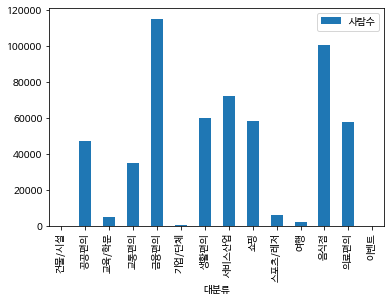

In [7]:
plt.figure(figsize=(30,8))
f.plot(kind='bar', x='대분류', y='사람수')
plt.show()

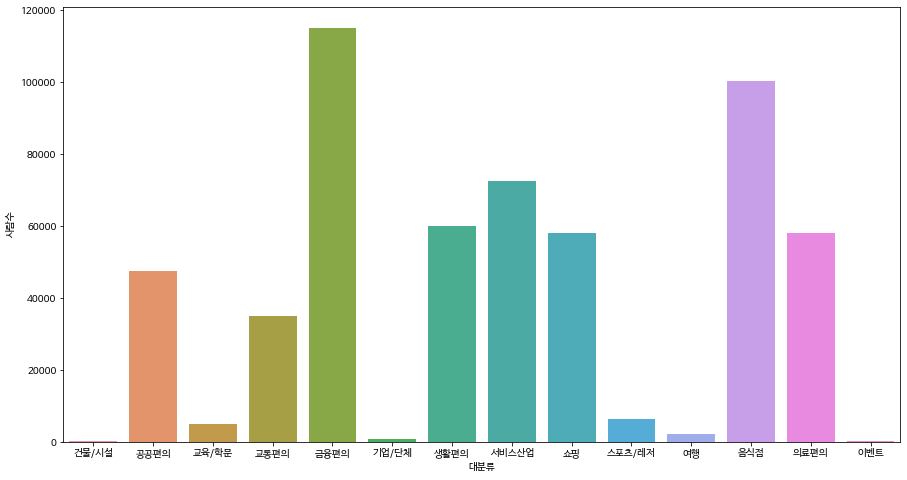

In [11]:
plt.figure(figsize=(15,8))
sns.barplot(x= f['대분류'], y=f['사람수'])
plt.show()

#### 20200907 ~ 20200910에 각 대분류에 전화한 평균 연령

#### Step by step

In [14]:
df['일자'].dtype

dtype('int64')

In [15]:
df[(df['일자'] > 20200906) & (df['일자'] < 20200911)]

,일자,연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
11,20200908,30,남성,강원,강릉시,생활편의,생활서비스,0.0001
25,20200910,40,남성,강원,강릉시,서비스산업,공공기업,0.0001
39,20200908,50,남성,강원,강릉시,음식점,한식,0.0003
48,20200910,60,여성,강원,강릉시,생활편의,생활편의,0.0003
49,20200909,20,남성,강원,강릉시,음식점,한식,0.0001
...,...,...,...,...,...,...,...,...
561085,20200910,50,여성,충북,청주시,생활편의,생활편의,0.0002
561089,20200910,40,여성,충북,청주시,쇼핑,쇼핑,0.0003
561101,20200907,70,남성,충북,청주시,의료편의,의료시설,0.0001
561105,20200910,50,남성,충북,청주시,생활편의,생활편의,0.0002


In [16]:
df1 = df[(df['일자'] > 20200906) & (df['일자'] < 20200911)]
df1

,일자,연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
11,20200908,30,남성,강원,강릉시,생활편의,생활서비스,0.0001
25,20200910,40,남성,강원,강릉시,서비스산업,공공기업,0.0001
39,20200908,50,남성,강원,강릉시,음식점,한식,0.0003
48,20200910,60,여성,강원,강릉시,생활편의,생활편의,0.0003
49,20200909,20,남성,강원,강릉시,음식점,한식,0.0001
...,...,...,...,...,...,...,...,...
561085,20200910,50,여성,충북,청주시,생활편의,생활편의,0.0002
561089,20200910,40,여성,충북,청주시,쇼핑,쇼핑,0.0003
561101,20200907,70,남성,충북,청주시,의료편의,의료시설,0.0001
561105,20200910,50,남성,충북,청주시,생활편의,생활편의,0.0002


In [17]:
df2 = pd.pivot_table(df1,
                    index='대분류',
                    columns = '일자',
                    values = '연령',
                    aggfunc='mean')

df2

일자,20200907,20200908,20200909,20200910
대분류,,,,
건물/시설,44.705882,42.500000,42.500000,40.000000
공공편의,47.336469,46.933877,47.549213,47.030056
교육/학문,36.939655,37.058824,37.133333,38.461538
교통편의,45.871067,46.279401,45.852436,45.968661
금융편의,46.414273,46.623348,46.751269,45.861638
기업/단체,47.333333,51.923077,49.375000,56.400000
생활편의,50.288227,49.619755,48.914186,48.811248
서비스산업,46.181239,46.156295,46.355854,46.269702
쇼핑,47.923048,48.291721,48.726609,48.319328


---

In [18]:
# query
pdf1 = pd.pivot_table(df.query('일자 >= 20200907 and 일자 <= 20200910'),                # 피벗할 데이터프레임
                     index = '대분류',    # 행 위치에 들어갈 열
                     columns = '일자',    # 열 위치에 들어갈 열
                     values = '연령',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf1 = pdf1.sort_values(20200907, ascending=False)
pdf1

일자,20200907,20200908,20200909,20200910
대분류,,,,
이벤트,55.000000,37.500000,38.333333,38.571429
생활편의,50.288227,49.619755,48.914186,48.811248
쇼핑,47.923048,48.291721,48.726609,48.319328
스포츠/레저,47.632509,46.699507,46.652361,46.687117
공공편의,47.336469,46.933877,47.549213,47.030056
기업/단체,47.333333,51.923077,49.375000,56.400000
금융편의,46.414273,46.623348,46.751269,45.861638
서비스산업,46.181239,46.156295,46.355854,46.269702
의료편의,45.989828,46.281900,46.195203,45.775934


In [20]:
# 조건식
pdf1 = pd.pivot_table(df[(df['일자'] > 20200906) & (df['일자'] < 20200911)],                # 피벗할 데이터프레임
                     index = '대분류',    # 행 위치에 들어갈 열
                     columns = '일자',    # 열 위치에 들어갈 열
                     values = '연령',     # 데이터로 사용할 열
                     aggfunc = 'mean')   # 데이터 집계함수
pdf1 = pdf1.sort_values(20200907, ascending=False)
pdf1

일자,20200907,20200908,20200909,20200910
대분류,,,,
이벤트,55.000000,37.500000,38.333333,38.571429
생활편의,50.288227,49.619755,48.914186,48.811248
쇼핑,47.923048,48.291721,48.726609,48.319328
스포츠/레저,47.632509,46.699507,46.652361,46.687117
공공편의,47.336469,46.933877,47.549213,47.030056
기업/단체,47.333333,51.923077,49.375000,56.400000
금융편의,46.414273,46.623348,46.751269,45.861638
서비스산업,46.181239,46.156295,46.355854,46.269702
의료편의,45.989828,46.281900,46.195203,45.775934


---

In [19]:
pdf1.index

Index(['이벤트', '생활편의', '쇼핑', '스포츠/레저', '공공편의', '기업/단체', '금융편의', '서비스산업', '의료편의',
       '교통편의', '건물/시설', '음식점', '여행', '교육/학문'],
      dtype='object', name='대분류')

#### 피벗테이블을 바탕으로 한 그래프

<AxesSubplot:xlabel='대분류'>

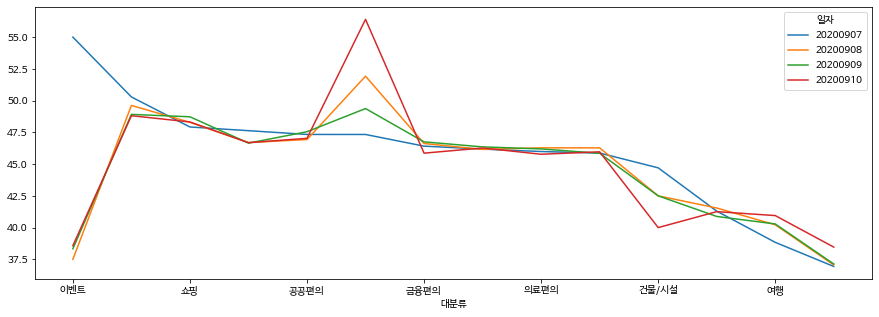

In [25]:
pdf1.plot(kind='line',figsize=(15,5)) 
# pdf1.plot(kind='line',figsize=(15,5),legend=[pdf1.columns])

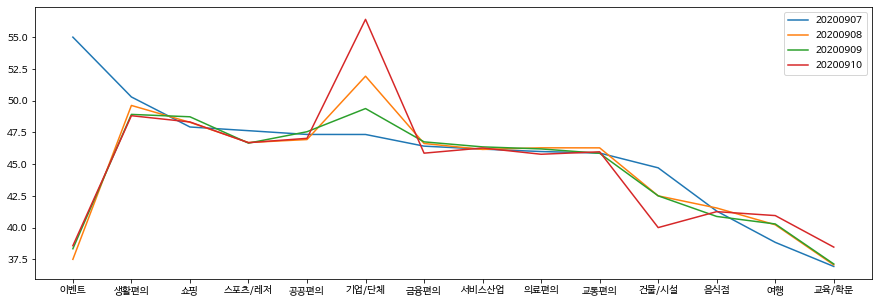

In [23]:
plt.figure(figsize=(15,5))
plt.plot(pdf1)
plt.legend(pdf1.columns)
plt.show()

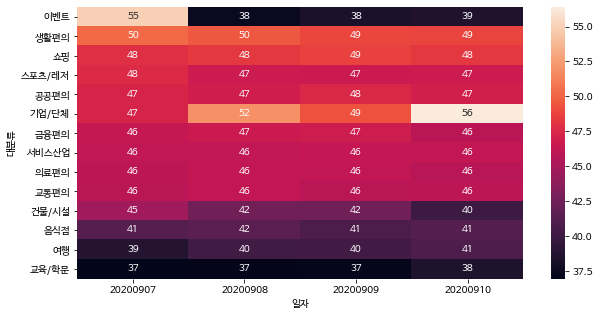

In [26]:
plt.figure(figsize=(10,5))
sns.heatmap(pdf1,annot=True)
plt.show()

In [30]:
df.tail(3)

,일자,연령,성별,시도,시군구,대분류,중분류,통화비율(시군구내)
561126,20200905,40,남성,충북,청주시,음식점,한식,0.0004
561127,20200905,40,남성,충북,청주시,의료편의,의료시설,0.0001
561128,20200928,50,남성,충북,청주시,교통편의,교통편의,0.0002


In [36]:
pdf3 = df[df['시군구']=='강남구'].groupby('중분류').mean()['연령'].reset_index()
pdf3

,중분류,연령
0,가전,40.000000
1,가정의례,30.869565
2,간식,40.000000
3,건설/건축,43.714286
4,골프,45.882353
5,공공기관,30.000000
6,공공기업,38.500000
7,금융편의,30.000000
8,기타의료시설,35.581395
9,대형유통점,41.555556


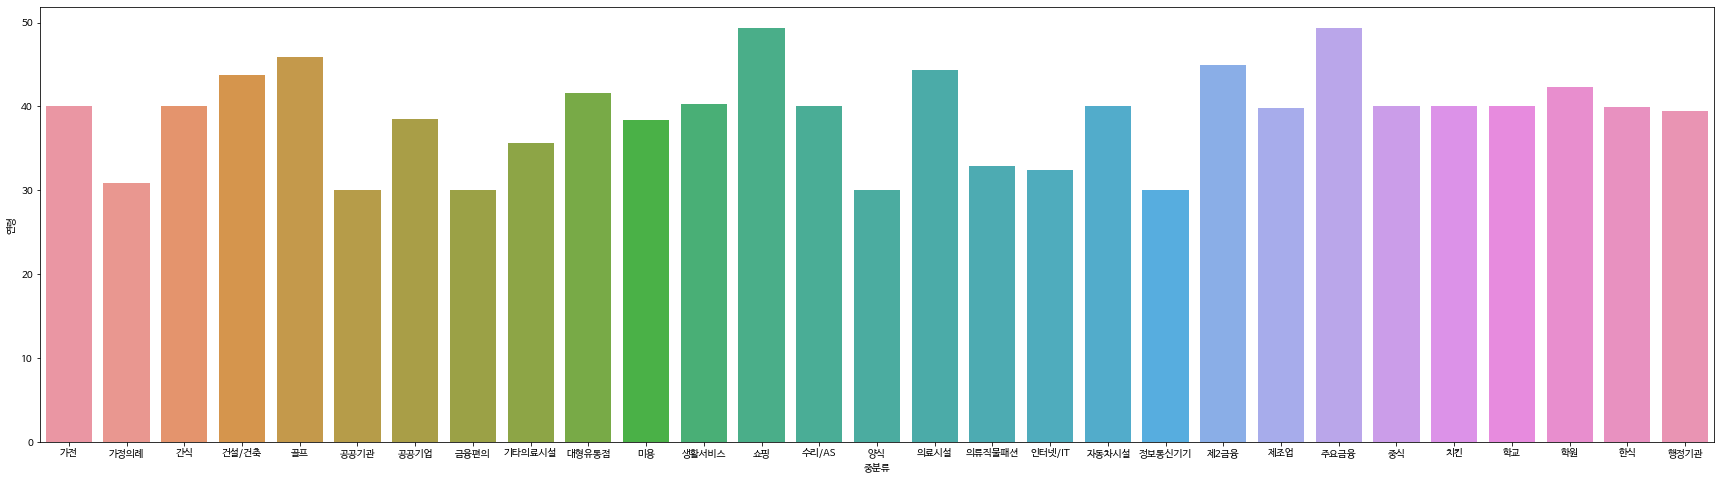

In [38]:
plt.figure(figsize=(30,8))
sns.barplot(x=pdf3['중분류'],y=pdf3['연령'])
plt.show()

#### 지역명을 입력하면 중분류에 따른 평균 연령을 보여주는 함수 생성

지역명을 입력하세요.강남구


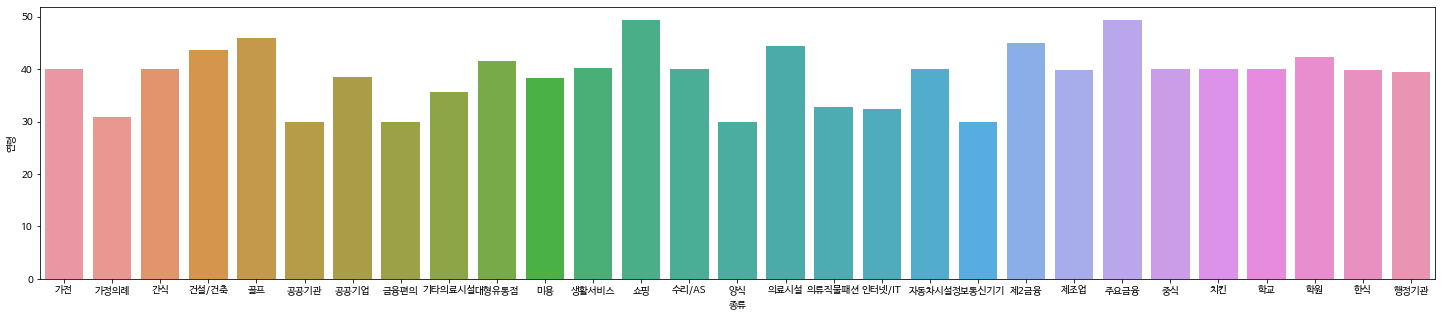

In [45]:
name = input("지역명을 입력하세요.")
def age_graph(name):
    pdf3 = df[df['시군구']==name].groupby('중분류').mean()['연령'].reset_index()
    plt.figure(figsize=(25,5))
    sns.barplot(x=pdf3['중분류'],y=pdf3['연령'])
    plt.xlabel("종류", size=10)
    plt.ylabel("연령", size=10)
    plt.show()
    
age_graph(name)

---

In [46]:
def age_graph(name):
    location = df[df['시군구'] == name]
    result = location.groupby('중분류')['연령'].mean()

    plt.figure(figsize=(25,5))
    sns.barplot(result.index, result.values)
    plt.xlabel("종류", size=10)
    plt.ylabel("연령", size=10)

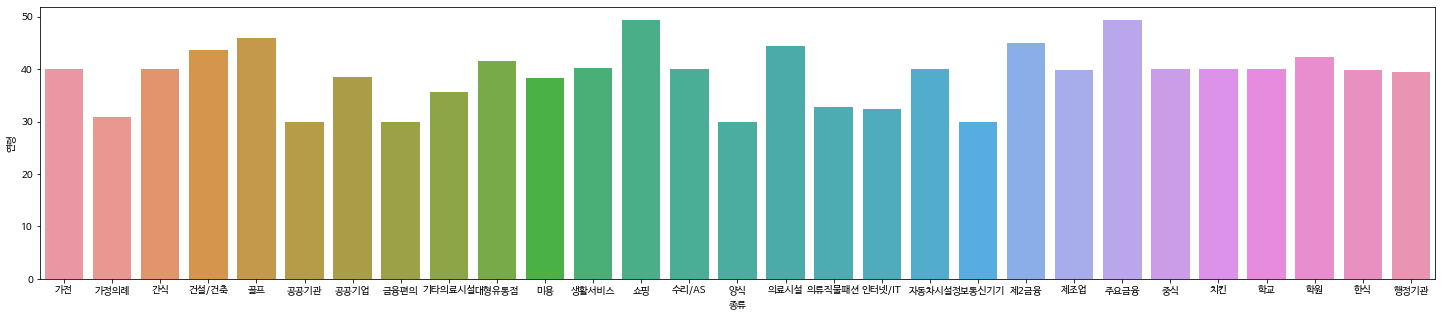

In [47]:
age_graph('강남구')

---